# The Busies FEUI's Lecturer - Time Path

***This is my personal project, I will try seek pattern who and when canceling the class by using twitter data, which usually used by Biro Pendidikan FEB UI to announce a canceled or reschedule class. <span style="color:blue">However, the main objective of this task is not to analyze those path but to enhance my personal data wrangling skills, espesialy using pandas str and regex method</span>**

In [1]:
import json
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import re
import warnings
import string

sns.set(style="whitegrid", palette="tab10")
warnings.simplefilter(action="ignore")
pd.set_option("display.max_rows", 7)

%matplotlib inline

In [2]:
# @hidden_cell
consumer_key = 'zkH50DtMmeoUcX3rNEFe2I88k'
consumer_secret = 'fHR9S6V3wGgPiQgsUbDktxvrJKPxlMnKwBmM6z2jur1dknH5TE'
access_token = '808655955315392512-WMTmxhMFTIwzDMj8U2D0sAW9ZepUhm1'
access_secret = 'ZCHZgGVtxP2J65h1LO65WSQ51R6j2HiY0HIV6e8rLEZJC'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

### Account info as Data Source

In [3]:
from twitterscraper import query_user_info

def get_user_info(twitter_user):
    """
    Using the query_user_info method
    :param twitter_user: the twitter user to capture user data
    :return: twitter_user_data: returns a dictionary of twitter user data
    """
    user_info = query_user_info(user= twitter_user)
    twitter_user_data = {}
    twitter_user_data["user"] = user_info.user
    twitter_user_data["fullname"] = user_info.full_name
    twitter_user_data["location"] = user_info.location
    twitter_user_data["blog"] = user_info.blog
    twitter_user_data["date_joined"] = user_info.date_joined
    twitter_user_data["id"] = user_info.id
    twitter_user_data["num_tweets"] = user_info.tweets
    twitter_user_data["following"] = user_info.following
    twitter_user_data["followers"] = user_info.followers
    twitter_user_data["likes"] = user_info.likes
    twitter_user_data["lists"] = user_info.lists
    
    return twitter_user_data

get_user_info("birpendfeui")

INFO: {'User-Agent': 'Mozilla/5.0 (compatible, MSIE 11, Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
INFO: Using proxy 192.227.158.57:80
INFO: Got user information from username birpendfeui


{'user': 'birpendfeui',
 'fullname': 'BiroPendidikan FEBUI',
 'location': 'Depok, West Java',
 'blog': '',
 'date_joined': '03.09 - 22 Okt 2010',
 'id': '206127362',
 'num_tweets': 19050,
 'following': 23,
 'followers': 5549,
 'likes': 289,
 'lists': 0}

In [4]:
alltweets = []
new_tweets = api.user_timeline(screen_name="birpendfeui", count=10000)
alltweets.extend(new_tweets)

In [5]:
#Sample
alltweets[9]

Status(_api=<tweepy.api.API object at 0x0000015D81C8E7F0>, _json={'created_at': 'Fri Nov 22 02:15:16 +0000 2019', 'id': 1197700041550385152, 'id_str': '1197700041550385152', 'text': '[ECAU] Akuntansi Keuangan 1 dosen Sylvia Veronica NPS kuliah pengganti akan diberikan hari Senin, 2/12 R. A.318', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 206127362, 'id_str': '206127362', 'name': 'BiroPendidikan FEBUI', 'screen_name': 'birpendfeui', 'location': 'Depok, West Java', 'description': 'Agar dpt disetujui (accept) permintaan follow-nya, cantumkan Nama dan NPM sesuai SIAK-NG pada Profile/Bio kalian.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': True, 'follower

## Retrieve Data per tweet

In [6]:
ya = [] 
for status in tweepy.Cursor(api.user_timeline, id="birpendfeui", tweet_mode="extended").items():
    dict_ = {'Screen Name': status.user.screen_name,
                'User Name': status.user.name,
                'Tweet Created At': (status.created_at),
                'Tweet Text': status.full_text,
                "Tweet Link": f"twitter.com/i/web/status/{status.id}",
                'User Location': (status.user.location),
                'Tweet Coordinates': (status.coordinates),
                'Retweet Count': (status.retweet_count),
                'Retweeted': (status.retweeted),
                'Favorited': (status.favorited),
                'Replied': (status.in_reply_to_status_id_str)
                }
    ya.append(dict_)

In [7]:
data = pd.DataFrame(ya)
data.sample(10)

,Screen Name,User Name,Tweet Created At,Tweet Text,Tweet Link,User Location,Tweet Coordinates,Retweet Count,Retweeted,Favorited,Replied
1686,birpendfeui,BiroPendidikan FEBUI,2019-02-04 03:51:24,Ralata [ECIE] Pasar Modal Islam dosen M. Budi ...,twitter.com/i/web/status/1092269365171376133,"Depok, West Java",None,0,False,False,1092268528520941568
2790,birpendfeui,BiroPendidikan FEBUI,2018-05-22 02:50:40,[ECIE] Pengantar Ekonomi 2 dosen Susijati B. H...,twitter.com/i/web/status/998758010326470657,"Depok, West Java",None,0,False,False,None
2406,birpendfeui,BiroPendidikan FEBUI,2018-10-02 07:15:23,[ECAU] Audit Keuangan Negara dosen Jarot Sembo...,twitter.com/i/web/status/1047022215475138562,"Depok, West Java",None,0,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...
716,birpendfeui,BiroPendidikan FEBUI,2019-08-07 04:34:06,[APEB] telah dibuka kembali tambahan 1 kelas d...,twitter.com/i/web/status/1158959477007065088,"Depok, West Java",None,0,False,False,None
140,birpendfeui,BiroPendidikan FEBUI,2019-11-11 04:08:22,[ECAU] Perpajakan Internasional dosen Monica S...,twitter.com/i/web/status/1193742236338417664,"Depok, West Java",None,0,False,False,None
1715,birpendfeui,BiroPendidikan FEBUI,2019-01-30 02:53:21,https://t.co/DwiJCEbDVr,twitter.com/i/web/status/1090442816101076992,"Depok, West Java",None,0,False,False,None


**Lets do data selection to get appropriate data source we want**

In [8]:
"""
We will use only two semester in Winter 18 and Summer 19. Even though, We need more.
Winter Class started at Sep 3 to Dec 24, while Summer at Feb 4 to May 29
"""
print (min(data["Tweet Created At"]), max(data["Tweet Created At"]))

2018-03-19 07:05:43 2019-11-23 02:39:20


In [9]:
x = data.loc[(data["Tweet Created At"] >= "2018-09-01") & (data["Tweet Created At"] <= "2018-12-24")]
y = data.loc[(data["Tweet Created At"] >= "2019-02-02") & (data["Tweet Created At"] <= "2019-05-29")]
filtere = pd.concat([x,y], axis=0)
filtere.sample()

,Screen Name,User Name,Tweet Created At,Tweet Text,Tweet Link,User Location,Tweet Coordinates,Retweet Count,Retweeted,Favorited,Replied
2553,birpendfeui,BiroPendidikan FEBUI,2018-09-18 06:42:41,"[ECMU] NPPHI dosen Aryana Satria, kuliah PENGG...",twitter.com/i/web/status/1041940555389784065,"Depok, West Java",None,0,False,False,None


In [10]:
# akan (will) mean the Educ Campus Unit announce class cancel nor reschedule a cancel class in other day
tweet = filtere["Tweet Text"]
ganti = filtere[tweet.str.contains(r"akan", flags=re.I)]
ganti.sample(3)

,Screen Name,User Name,Tweet Created At,Tweet Text,Tweet Link,User Location,Tweet Coordinates,Retweet Count,Retweeted,Favorited,Replied
2578,birpendfeui,BiroPendidikan FEBUI,2018-09-17 04:16:19,[ECAU] Sistem Informasi Akuntansi (D) dosen An...,twitter.com/i/web/status/1041541332240523264,"Depok, West Java",None,0,False,False,None
1901,birpendfeui,BiroPendidikan FEBUI,2018-11-28 07:20:05,[ECAU] Akuntansi Biaya (D) dosen Rafika Kuliah...,twitter.com/i/web/status/1067679508164042752,"Depok, West Java",None,0,False,False,None
1259,birpendfeui,BiroPendidikan FEBUI,2019-03-19 01:43:18,[FEUI] MMI dosen Ratna Juwita Kuliah Pengganti...,twitter.com/i/web/status/1107819803304091649,"Depok, West Java",None,0,False,False,None


In [11]:
'''
Sometime the admin revise the reschedule or cancel cancelled class, marked by "Ralat" and "tetap" word in tweet. 
Thus, there is duplicate reschedule announce must have been duplicated. 
this time our's analysis not too specific to what (clock) time level of substitute class.
 We'll also exclude Public Lecture, "kuliah umum". So, simply I'll drop all those tweet.
'''
i = ganti[~tweet.str.contains(r'ralat', flags=re.I)]
i = i[~tweet.str.contains(r'tetap', flags=re.I)]
i = i[~tweet.str.contains(r'biasa', flags=re.I)]
i = i[~tweet.str.contains(r'semua', flags=re.I)]
i = i[~tweet.str.contains(r'tutu', flags=re.I)]
i = i[~tweet.str.contains(r'umum', flags=re.I)]
i.sample(3)

,Screen Name,User Name,Tweet Created At,Tweet Text,Tweet Link,User Location,Tweet Coordinates,Retweet Count,Retweeted,Favorited,Replied
2188,birpendfeui,BiroPendidikan FEBUI,2018-11-01 09:45:14,[UUI] MMI dosen Esther Sri Astuti Kuliah Hari ...,twitter.com/i/web/status/1057931564141539328,"Depok, West Java",None,0,False,False,None
1267,birpendfeui,BiroPendidikan FEBUI,2019-03-18 03:51:03,[ECIE] Manajemen Keuangan Islam dosen Permata ...,twitter.com/i/web/status/1107489568377331712,"Depok, West Java",None,0,False,False,None
2372,birpendfeui,BiroPendidikan FEBUI,2018-10-04 08:49:50,[ECAU] Perpajakan 2 dosen Dian Nastiti /Bernar...,twitter.com/i/web/status/1047770759387467776,"Depok, West Java",None,0,False,False,None


## Sample Tweet 
**Tweet can contains class clasification, name of class, lecturer name, date of new schedule, and classroom code**
               
               **We need manipulating Tweet Text column because to get above information**

In [12]:
i["Tweet Text"][800]

'[ECMU] Manajemen Portfolio dosen Cinthia Apriani, kuliah akan diberikan hari Jumat, 17/5 jam 07.00 R. A.205 (2 sesi)'

First, We can split those text by four part 

**[ECMU] <span style="color:red">*|*</span> Manajemen Portfolio <span style="color:red">*|*</span> dosen Cinthia Apriani, kuliah akan diberikan <span style="color:red">*|*</span> hari Jumat, 17/5 jam 07.00 R. A.205 (2 sesi) <span style="color:red">*|*</span>**

Second step, we split last part by three subpart which contain, days or date, clock, and classroom code

**hari Jumat, 17/5 <span style="color:red">*|*</span>jam 07.00 <span style="color:red">*|*</span>R. A.205 (2 sesi) <span style="color:red">*|* </span>**

Other text tweet columns values which doesn't follow above path, we will take care later

In [13]:
len(i)

1545

## Data Cleansing (Gross)

In [14]:
#replace several special char
o = i["Tweet Text"].str.replace(r"[\[}){(\],;&]", "")
i["Tweet Text"] = o

#Add column for Course Code
trial = i[["Tweet Created At", "Tweet Text", "Tweet Link"]]
trial["code_clasif"] = trial["Tweet Text"].str.extract(r'([aeu][uca]..?)', flags=re.I)[0].str.upper()
trial.sample(3)

,Tweet Created At,Tweet Text,Tweet Link,code_clasif
2144,2018-11-06 06:18:13,ECMU Manajemen Pemasan dosen Rifely Dewi Astut...,twitter.com/i/web/status/1059691403490390016,ECMU
1377,2019-03-06 03:50:04,ECAU Analisis Perancangan Sistem Informasi dos...,twitter.com/i/web/status/1103140663493767169,ECAU
2295,2018-10-12 03:15:33,ECEU Metode Penelitian dosen Uka Wikarya kulia...,twitter.com/i/web/status/1050585738327146496,ECEU


In [15]:
trial["code_clasif"].unique()

array(['ECEU', 'UAS ', 'ECAU', 'ECEI', 'ECFE', 'ECMU', 'ECIE', 'ECEA',
       'UUI ', 'EACU', nan, 'AAT ', 'EU E', 'ACEA', 'ACAR', 'EASI',
       'AAN ', 'ECEF', 'EUI ', 'UANG', 'AU A', 'EU I'], dtype=object)

There are still many erroneous, either typo or wrong extract (in nan).

In [16]:
#We assume name of class always following after code_clasif word
p = trial["Tweet Text"].str.split(r" ", 1, expand=True)
kelas = p[1].str.split(r"[Dd][Oo]sen", expand=True)
kelas

,0,1,2
1739,Matematika Ekonomi amp Bisnis,Nachrowi kuliah Pengganti akan diberikan hari...,None
1741,Mikroekonomi 1,M. Shauqi Azar kuliah pengganti akan diberika...,None
1743,Para Pengawas UAS Ujian Akhir Semester Gasal 2...,None,None
...,...,...,...
1697,Manajemen Sumber Daya Manusia,Nayunda A. kuliah PENGGANTI akan diberikan ha...,None
1698,Ekonomi Sumber Daya Alam amp Lingkungan,Alin Halimatussadiah kuliah hari Rabu 6/2 DIT...,None
1700,Perdagangan Internasional,Mari Pangestu kuliah hari Senin 4/2 DITIADAKAN,None


*We'll delete all spesific class name, like name_class A or B. We also detect undesirable word, "amp". We'll replace all those with null char.*

In [17]:
kelas[0] = kelas[0].str.replace(r"amp", "", flags=re.I)
kelas[0] = kelas[0].str.replace(r"kelas\s?", "", flags=re.I)
kelas[0] = kelas[0].str.replace(r"kls\s?", "", flags=re.I)
kelas[0] = kelas[0].str.replace(r"-", " ", flags=re.I)
kelas[0] = kelas[0].str.replace(r"[(a-z)\s]$","", flags=re.I)
kelas[0] = kelas[0].str.replace(r"\s$","", flags=re.I)
kelas.sample(10)

,0,1,2
900,Statistika Ekonomi dan Bisnis,Prani Sastiono kuliah pengganti akan diberika...,None
1423,Makroekonomi 1,Qisha Quarina kuliah PENGGANTI akan diberikan...,None
2608,SIA,Teguh Imam M Kuliah Pengganti akan diberikan ...,None
...,...,...,...
1982,Mikroekonomi 2,Ari Kuncoro kuliah hari Jumat 23/11 DITIADAKAN,None
2537,Manajemen Keuangan E,Asiah Muchtar kuliah PENGGANTI akan diberikan...,None
1862,Bisnis Global Indonesia,Evony Silvino kuliah PENGGANTI akan diberikan...,None


In [18]:
# "dosen" keyword doesn't work for 45 row below, thus we need new keyword, 
# Lets try 'kuliah' word
satu = kelas[~kelas[0].str.contains(r"kuliah")]
dua = kelas[kelas[0].str.contains(r"kuliah")]

In [19]:
d = dua[0].str.split(r"[Kk][Uu][lL][Ii][Aa][Hh]", 1, expand=True)
#but there are two rows have 'kuliah' word in first place before name, 1232 and 1206.
#d[0][1232] = d[1][1232]
#d[0][1206] = d[1][1206]
d[0] = d[0].str.replace(r"^\s+","", flags=re.I)

d.sample(10)

,0,1
1477,Tatakelola Perusahaan Manajemen Risiko,PENGGANTI akan diberikan hari Kamis 28/2 jam ...
2517,Manajemen Filantropi Islam,PENGGANTI akan diberikan hari Selasa 25/9 jam...
2335,Sistenm Informasi Akuntansi D,PENGGANTI akan diberikan hari Rabu 10/10 jam ...
...,...,...
2092,Sistem Informasi Akuntansi C,PENGGANTI akan diberikan hari Rabu 14/11 jam ...
861,Sistem Ekonomi Islam,pengganti akan diberikan hari Kamis 9/5 jam 0...
1755,Pengantar Akuntansi E Chaerul D. Djakman,hari Kamis 13/12 DITIADAKAN kuliah pengganti ...


In [20]:
kuliah = pd.concat([satu, d], axis=0)
kuliah.sample()

,0,1,2
922,Mikroekonomi 1,Tirta Hidayat Kuliah Pengganti akan diberikan...,None


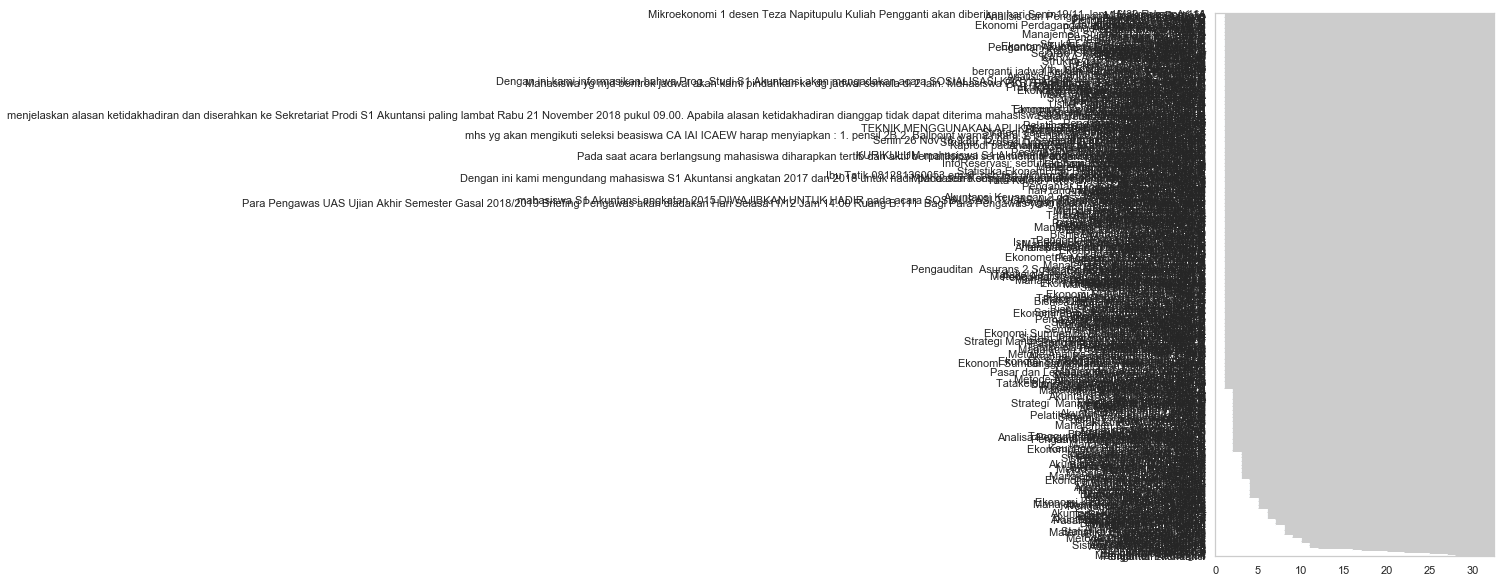

In [21]:
plt.figure(figsize=(5,10))
kuliah[0].value_counts().plot(kind="barh")

In [22]:
trial["class"] = kuliah[0]
print ((kuliah[0].value_counts()==1).value_counts())
print(len(kuliah))

True     480
False    213
Name: 0, dtype: int64
1545


We can see that most of column value already clean, otherwise in the tail bar not (480 rows). But, I think enough for now.

In [23]:
x = kuliah[1].str.split(r"\s?[Kk][Uu][lL][Ii][Aa][Hh]", expand=True)
x

,0,1,2
1739,Nachrowi,Pengganti akan diberikan hari Selasa 11/12 j...,None
1741,M. Shauqi Azar,pengganti akan diberikan hari Selasa 11/12 ja...,None
1743,None,None,None
...,...,...,...
1615,pengganti akan diberikan hari Selasa 19/2 jam...,None,None
1636,pengganti akan diberikan hari Senin 11/2 jam ...,None,None
1685,akan diberikan hari Rabu 6/2 jam 08.00 R. B.1...,None,None


In [24]:
#We can see that not all tweet contain lecturer name
for i in x.index:
    if x[1][i] == None:
        x[1][i], x[0][i] = x[0][i], None

In [25]:
x

,0,1,2
1739,Nachrowi,Pengganti akan diberikan hari Selasa 11/12 j...,None
1741,M. Shauqi Azar,pengganti akan diberikan hari Selasa 11/12 ja...,None
1743,None,None,None
...,...,...,...
1615,None,pengganti akan diberikan hari Selasa 19/2 jam...,None
1636,None,pengganti akan diberikan hari Senin 11/2 jam ...,None
1685,None,akan diberikan hari Rabu 6/2 jam 08.00 R. B.1...,None


In [26]:
#Add new column
trial["lecture_name"] = x[0]

u = x[1].str.split("[Hh]ari", expand=True)
u = u[1].str.split("[Rr][\.Uu][Aa]?[nN]?[gG]?[\s]?", expand=True)
u

,0,1,2,3
1739,Selasa 11/12 jam 14.00,B.107,None,None
1741,Selasa 11/12 jam 14.00,A.102,None,None
1743,None,None,None,None
...,...,...,...,...
1615,Selasa 19/2 jam 16.30,A.113,None,None
1636,Senin 11/2 jam 14.00,B.103,None,None
1685,Rabu 6/2 jam 08.00,B.108 ds,None,None


In [27]:
#W e assume classroom always last word
u["classroom"] = None
for x in u.index:
    if u[3][x] != None:
        u["classroom"][x] = u[3][x]
    elif u[2][x] != None:
        u["classroom"][x] = u[2][x]
    elif u[1][x] != None:
        u["classroom"][x] = u[1][x]
u

,0,1,2,3,classroom
1739,Selasa 11/12 jam 14.00,B.107,None,None,B.107
1741,Selasa 11/12 jam 14.00,A.102,None,None,A.102
1743,None,None,None,None,None
...,...,...,...,...,...
1615,Selasa 19/2 jam 16.30,A.113,None,None,A.113
1636,Senin 11/2 jam 14.00,B.103,None,None,B.103
1685,Rabu 6/2 jam 08.00,B.108 ds,None,None,B.108 ds


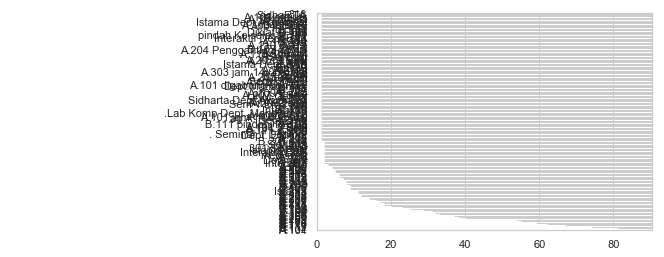

In [28]:
u["classroom"].value_counts().plot(kind="barh")

*We could see that classroom not always be last word. Somethime following by date or lecturer name*

In [29]:
l = u[0].str.split(r"[jJ]am", expand=True)
l

,0,1,2
1739,Selasa 11/12,14.00,None
1741,Selasa 11/12,14.00,None
1743,None,None,None
...,...,...,...
1615,Selasa 19/2,16.30,None
1636,Senin 11/2,14.00,None
1685,Rabu 6/2,08.00,None


In [30]:
#We assume clock always last word
l["jam"] = None
for x in l.index:
    if l[2][x] != None:
        l["jam"][x] = l[2][x]
    elif l[1][x] != None:
        l["jam"][x] = l[1][x]

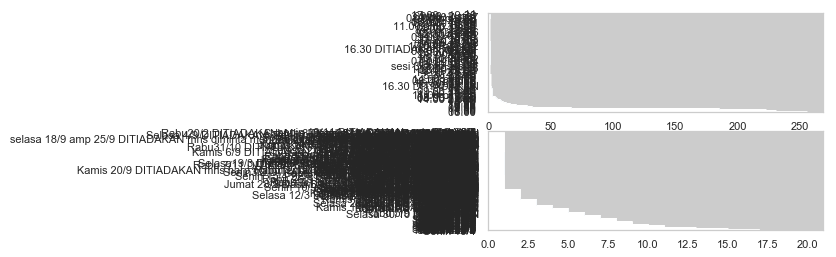

In [31]:
plt.subplot(2,1,1)
l["jam"].value_counts().plot(kind="barh")
plt.subplot(2,1,2)
l[0].value_counts().plot(kind="barh")

In [32]:
trial["date"] = l.loc[:,0]
trial["hour"] = l["jam"]
trial["classroom"] = u.loc[:,"classroom"]

In [33]:
#We divide to find another irrelvant row which pass out filter in first step
print (len(trial))
satu = trial[trial["date"].notnull()]
dua = trial[trial["date"].isnull()]
dua = dua[dua["lecture_name"].notnull()]
gross = pd.concat([satu, dua], axis=0)
print (len(gross))

1545
1531


In [34]:
#Delete if there is space at begining or end string
for i in gross.columns[1:]:
    gross[i] = gross[i].str.strip()

We deleted 14 rows because indicated irrelevant information

In [36]:
gross.to_csv("birpengross.csv")